<a href="https://colab.research.google.com/github/MileneCV/sales_predictions/blob/main/Project_1_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Milene Carmes Vallejo

10/13/2022

# Project 1 - Part 5 

# Import package

In [34]:
# import
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
set_config(display='diagram')
import matplotlib.pyplot as plt
from matplotlib import legend
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

# Load data 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/sales_predictions.csv'
df = pd.read_csv(filename)
df

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Explore data 

In [3]:
df_sales = df

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check duplicates 
df_sales.duplicated().sum()

0

In [6]:
# fix inconsistencies in 'Item_Fat_Content' column
dict_names = {'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'}
df_sales['Item_Fat_Content']. replace(dict_names, inplace = True)
df_sales['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Train/Test split 

 "Item_Outlet_Sales" column as target


In [7]:

# matrix  - drop columns Outlet_Identifier, Outlet_Establishment_Year (these features will not make any contribution in model building)
X = df_sales.drop(columns=['Item_Outlet_Sales', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Identifier'])

# target
y = df_sales['Item_Outlet_Sales']

# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('size of X_train(75% of df_sales)')
print(len(X_train))




size of X_train(75% of df_sales)
6392


# Selector columns 

In [8]:
# make selector columns:
# numerical columns
num_selector = make_column_selector(dtype_include = 'number')

# categorical columns
cat_selector = make_column_selector(dtype_include = 'object')

In [9]:
# check missing values 
df_sales.isna().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Impute any missing values.
There are missing values in numeric column Item_Weight that is float and categorical column Outlet_Size 

Use the ‘mean’ strategy for numeric columns (that is a float number) and the ‘most_frequent’ strategy for categorical columns.


## One HotEncoder and Scaler

In [10]:
# instantiate an imputer and ohe for categorical columns
freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

# instantiate an imputer and scaler for numeric columns
mean_imputer = SimpleImputer(strategy = 'mean')
scaler = StandardScaler()

In [11]:
# numeric pipeline 
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [12]:
# categorical pipeline 
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [13]:
# tuples - first element is the transformer and second element is a ColumnSelector oject
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [14]:
# ColumTransformer, put all together: numerical and categorical columns 
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f58f025e510>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f58f025e4d0>)])

# 1. First task is to build a linear regression model to predict sales.

Build a linear regression model.

Evaluate the performance of your model based on r^2.

Evaluate the performance of your model based on rmse.

## Build a linear regression model.

In [15]:
# instantiate a linear regression model
reg = LinearRegression()

In [16]:
# put preprocessor and linear regression model into a pipeline
reg_pipe = make_pipeline(preprocessor, reg)
reg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f58f025e510>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f58f025e4d0>)])),
                ('linearregression', LinearRegression())])

In [17]:
# fit the pipe in the training data
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f58f025e510>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f58f025e4d0>)])),
                ('linearregression', LinearRegression())])

In [18]:
# find predict values, and error values 
train_pred_linear = reg_pipe.predict(X_train)
test_pred_linear = reg_pipe.predict(X_test) # these are predict values 
# check predict Item_Outlet_Sales
test_pred_linear

array([1361.30704699,  783.83785147,  813.37881288, ..., 3404.69972553,
       1957.44280701, 2423.87180061])

In [19]:
train_pred_linear

array([3809.36426114, 2657.13562766, 2542.86721442, ..., 3840.22685812,
       1895.33477569, 1602.16422832])

In [20]:
# to make the analisis easier transform to df
prediction_df = X_test.copy()

# add new column to df:
# True value of  Item_Outlet_Sales is y_test
prediction_df['True Item_Outlet_Sales'] = y_test
# Predict value of Item_Outlet_Sales
prediction_df['Predicted Item_Outlet_Sales'] = test_pred_linear
# error value:
prediction_df['Error'] = test_pred_linear - y_test
prediction_df.describe()



,Item_Weight,Item_Visibility,Item_MRP,True Item_Outlet_Sales,Predicted Item_Outlet_Sales,Error
count,1775.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000
mean,12.718262,0.066507,138.030391,2095.231046,2113.440261,18.209215
std,4.661051,0.052985,61.119147,1661.406808,1291.761985,1094.862438
min,4.590000,0.000000,32.490000,33.290000,-1461.448801,-5623.805745
25%,8.510000,0.026934,93.093600,772.993800,1209.858607,-533.993034
50%,12.500000,0.053586,132.528400,1737.738000,2081.740116,88.970424
75%,16.700000,0.094514,181.812100,2986.113000,2998.806965,658.441454
max,21.350000,0.311090,266.588400,10236.675000,5649.868477,3479.679883


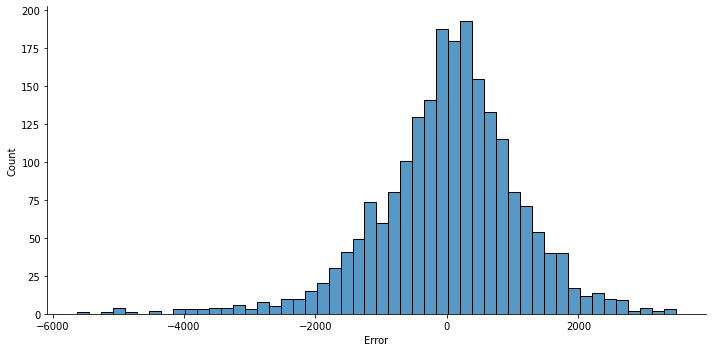

In [21]:
# to view error distribution plot Error column
error_plot = sns.displot(data= prediction_df, x='Error', aspect=2)

In [22]:
prediction_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,True Item_Outlet_Sales,Predicted Item_Outlet_Sales,Error
count,1775.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000
mean,12.718262,0.066507,138.030391,2095.231046,2113.440261,18.209215
std,4.661051,0.052985,61.119147,1661.406808,1291.761985,1094.862438
min,4.590000,0.000000,32.490000,33.290000,-1461.448801,-5623.805745
25%,8.510000,0.026934,93.093600,772.993800,1209.858607,-533.993034
50%,12.500000,0.053586,132.528400,1737.738000,2081.740116,88.970424
75%,16.700000,0.094514,181.812100,2986.113000,2998.806965,658.441454
max,21.350000,0.311090,266.588400,10236.675000,5649.868477,3479.679883


As we can see in the plot, with linear regression model there is a tendency to make large errors. We can see in prediction_df.describe() a lot of variation. The mean error is 18 but max is 3479 and min -5623. 


## Evaluate the performance of your model based on r^2.

In [23]:
train_r2 = r2_score(y_train, train_pred_linear)
test_r2 = r2_score(y_test, test_pred_linear)

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')


Model Training R2: 0.5606153870287736
Model Testing R2: 0.5656025072798097


This score can be interpreted as saying that linear regression model can account for about 56% of the variation in y_test using the features in X_test. This model is underfit.

## Evaluate the Model Using Regression Metrics


In [24]:
# I will test different models so let's create a function 
# to take MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [25]:
print('Testing')
# call the function
evaluate_regression(y_test, test_pred_linear)


Testing
scores: 
MAE: 805.86 
MSE: 1,198,492.82 
RMSE: 1,094.76 
R2: 0.57


In [26]:
print('Training')
evaluate_regression(y_train, train_pred_linear)

Training
scores: 
MAE: 847.26 
MSE: 1,300,339.30 
RMSE: 1,140.32 
R2: 0.56


It is better to use RMSE since we see in error plot, there is a tendency to make large errors and the RMSE is punishing those larger errors with a worse score if we compare with MAE. 



# 2- Second task is to build a regression tree model to predict sales.



## Decision Tree Regressor

In [27]:
# instantiate a model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [28]:
# put the model in pipeline
# tree-based models do not required scaled data, but I will use the same preprecessor for all model 
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

In [29]:
# fit the model on the training data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f58f025e510>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f58f025e4d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [30]:
# find predict values, and error values 
train_pred_dec_tree = dec_tree_pipe.predict(X_train)
test_pred_dec_tree = dec_tree_pipe.predict(X_test) # these are predict values 
# check predict Item_Outlet_Sales
test_pred_dec_tree

array([ 805.618 , 1249.0408,  479.376 , ..., 6371.706 , 3243.7776,
       3089.9778])

In [31]:
# call the function 
# Testing _score
print('Testing')
evaluate_regression(y_test, test_pred_dec_tree)


Testing
scores: 
MAE: 1,073.31 
MSE: 2,443,733.95 
RMSE: 1,563.24 
R2: 0.11


In [32]:
# training score
print('Training')
evaluate_regression(y_train, train_pred_dec_tree)



Training
scores: 
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00


Decision Tree Model is overfit since the score of trainig is 100% and testing is only 11%. Let's try RandonForest Model 

## Randon Forest

In [35]:
rf = RandomForestRegressor(random_state = 42)

tree_reg_pipe_rf = make_pipeline(preprocessor, rf)
tree_reg_pipe_rf.fit(X_train, y_train)
train_pred_tree_rf = tree_reg_pipe_rf.predict(X_train)
test_pred_tree_rf = tree_reg_pipe_rf.predict(X_test)

print('Testing')
evaluate_regression(y_test, test_pred_tree_rf)

Testing
scores: 
MAE: 774.20 
MSE: 1,249,818.91 
RMSE: 1,117.95 
R2: 0.55


In [36]:
print('Training')
evaluate_regression(y_train, train_pred_tree_rf)

Training
scores: 
MAE: 300.25 
MSE: 186,911.66 
RMSE: 432.33 
R2: 0.94


With Random Forest the R2 in training dataset is 55%, better than Decision Tree model that was 11% but it is not good. We can try to tunne it.  

### Tree Tunning a RandomForest

In [37]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Tuning the max_depth:

In [39]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

43

In [44]:
n_ests = list(range(2,43)) 
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
  rf_9_tunned = RandomForestRegressor(max_depth=n, random_state=42)
  tree_reg_pipe_rf = make_pipeline(preprocessor, rf_9_tunned)
  tree_reg_pipe_rf.fit(X_train, y_train)
  train_pred_tree_rf = tree_reg_pipe_rf.predict(X_train)
  test_pred_tree_rf = tree_reg_pipe_rf.predict(X_test)
  scores2.loc[n, 'Train Score'] = r2_score(y_train, train_pred_tree_rf)
  scores2.loc[n, 'Test Score'] = r2_score(y_test, test_pred_tree_rf)

In [47]:
scores2.sort_values(by='Test Score', ascending=False)

,Test Score,Train Score
5,0.602662,0.610539
6,0.601041,0.624356
7,0.597514,0.642773
4,0.596631,0.595925
8,0.596015,0.665335
9,0.593721,0.691202
10,0.590573,0.719583
11,0.584961,0.748843
12,0.582053,0.777407
13,0.576075,0.805156


In [48]:
# The 'max_depth' with better Testing score was 5 
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)

tree_reg_pipe_rf = make_pipeline(preprocessor, rf_5)
tree_reg_pipe_rf.fit(X_train, y_train)
train_pred_tree_rf = tree_reg_pipe_rf.predict(X_train)
test_pred_tree_rf = tree_reg_pipe_rf.predict(X_test)

print('Testing')
evaluate_regression(y_test, test_pred_tree_rf)



Testing
scores: 
MAE: 728.39 
MSE: 1,096,246.03 
RMSE: 1,047.02 
R2: 0.60


In [49]:
print('Training')
evaluate_regression(y_train, train_pred_tree_rf)

Training
scores: 
MAE: 755.37 
MSE: 1,152,591.90 
RMSE: 1,073.59 
R2: 0.61


With max_depth= 5 we can see that in training datase R2 score is 60% that is better than default value 55%. But the score is not good, let's try tune the n_estimators. 

#### Tuning the n_estimators (number of decision trees)

In [53]:
# by default n_estimators': 100
# let's try another values:
n_ests = [250, 300, 350, 450]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
  rf_5_tunned = RandomForestRegressor(max_depth=5, n_estimators=n)
  tree_reg_pipe_rf = make_pipeline(preprocessor, rf_5_tunned)
  tree_reg_pipe_rf.fit(X_train, y_train)
  train_pred_tree_rf = tree_reg_pipe_rf.predict(X_train)
  test_pred_tree_rf = tree_reg_pipe_rf.predict(X_test)
  scores2.loc[n, 'Train Score'] = r2_score(y_train, train_pred_tree_rf)
  scores2.loc[n, 'Test Score'] = r2_score(y_test, test_pred_tree_rf)


In [55]:
scores2.head()

,Test Score,Train Score
250,0.603196,0.610655
300,0.603147,0.610493
350,0.603293,0.610734
450,0.602712,0.61051


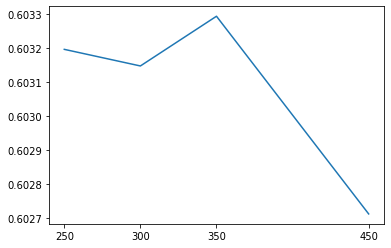

In [54]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);


We can see that we didn't improve the score of test dataset with tuning the n_estimators. It is 60%

# 3 -  Compare 2 different models on sales data set and determine which model to implement.

## Compare the performance of models based on R2. 
With linear regression model the R2 score in training dataset was 56%, with decision tree model was 11% and with random forest tunned the score was 60%.

These scores can be interpreted as saying that linear regression model can account for about 56% of the variation in y_test using the features in X_test and random forest model 60%.


## Compare the performance of 2 models based on MSE.

A lower MSE is better as we want to reduce the size of errors, especially large errors!


The mean of the target is 2095.231046 and if we check MSE in all model were: 

1 -linear regression was MSE: 1,198,492.82, 

2 - decision tree regressor was 2,347,939.96 


3 - in random forest: 1,096,246.03  

The MSE was lower with random forest regression but was too far from the mean target and any model had a score higher than 60%. I don't think this predictions models are good in this dataset. 
